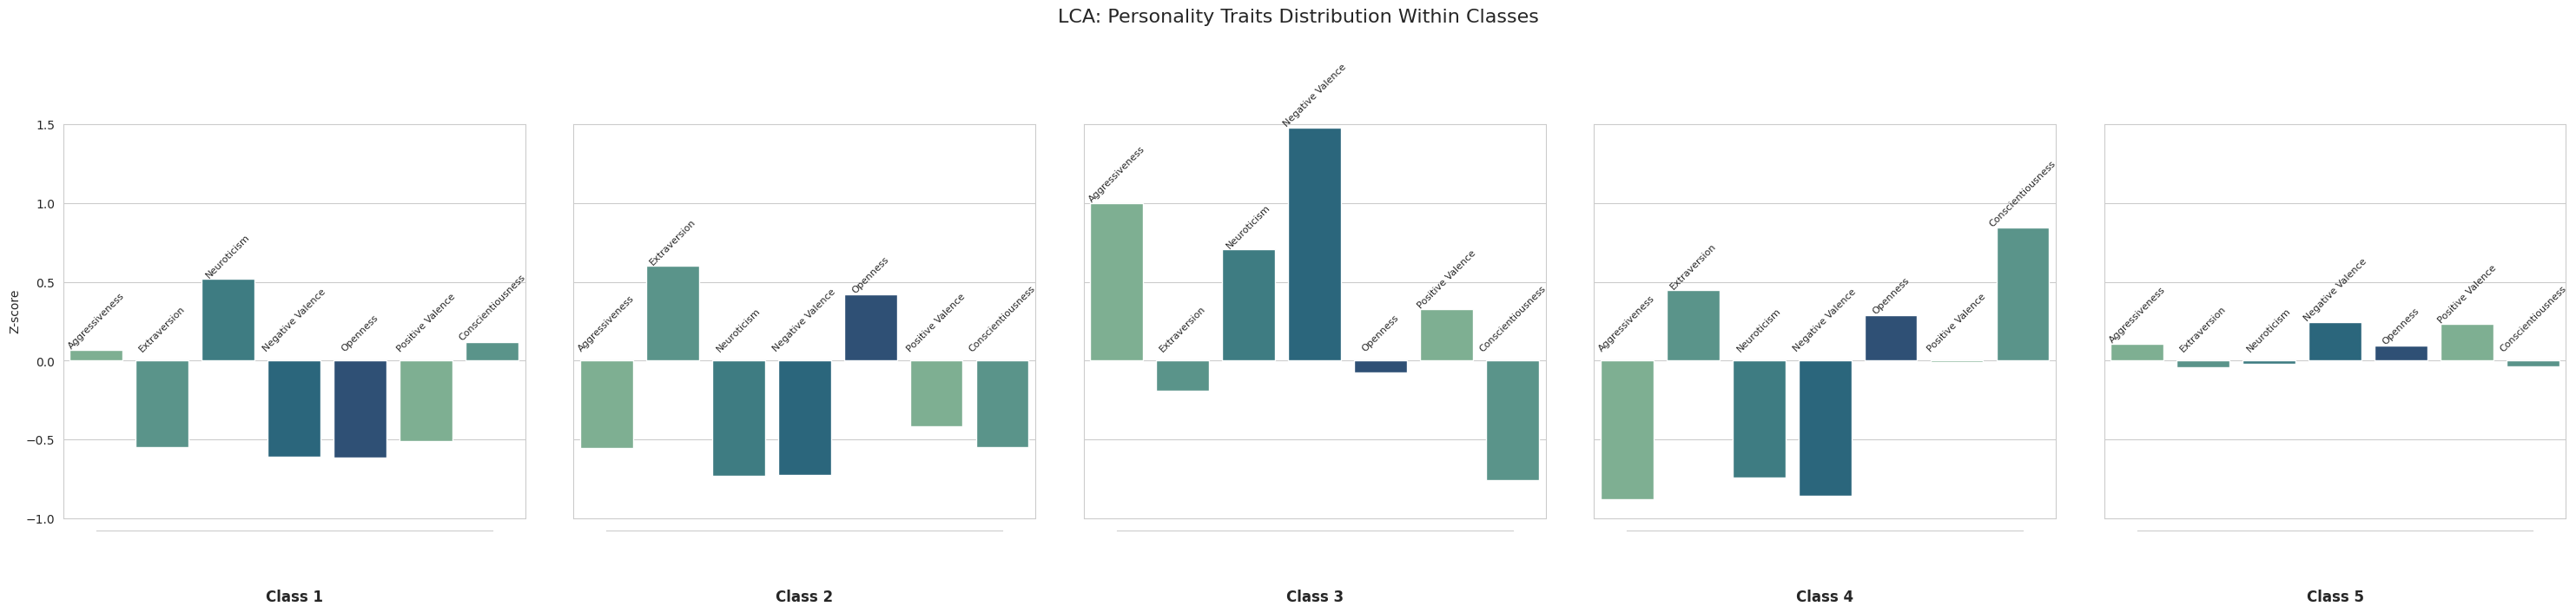

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

lca_data = pd.read_csv("lca_cluster_data_zscores.csv")

lca_data_long = pd.melt(lca_data, id_vars="Cluster", var_name="Trait", value_name="Z-score")

custom_palette = sns.color_palette("crest", n_colors=len(lca_data_long['Cluster'].unique()))

trait_mapping = {
    "agr_vp": "Aggressiveness",
    "eks_vp": "Extraversion",
    "neu_vp": "Neuroticism",
    "nv_vp": "Negative Valence",
    "otv_vp": "Openness",
    "pv_vp": "Positive Valence",
    "sav_vp": "Conscientiousness"
}

lca_data_long['Trait'] = lca_data_long['Trait'].map(trait_mapping)

cluster_order = [1, 2, 3, 4, 5]

g = sns.FacetGrid(lca_data_long, col="Cluster", col_wrap=len(cluster_order), col_order=cluster_order, height=6)
g.map(sns.barplot, "Trait", "Z-score", palette=custom_palette, order=list(trait_mapping.values()), errwidth=0)

for i, (ax, col) in enumerate(zip(g.axes, cluster_order), 1):
    ax.text(0.5, -0.15, f'Class {col}', transform=ax.transAxes, fontsize=12, fontweight='bold', va='center', ha='center')

    for bar, trait in zip(ax.containers[0], trait_mapping.values()):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, max(height, 0.05), trait, ha='center', va='bottom', fontsize=8, rotation=45)

g.set_axis_labels("", "Z-score")
g.set_titles("")
plt.suptitle("LCA: Personality Traits Distribution Within Classes", y=1.1, fontsize=16)

sns.despine(trim=True, left=False, right=False)

plt.subplots_adjust(hspace=0.3)

for ax in g.axes.flatten():
    ax.set_xticklabels([])

plt.show()